In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.style.use('dark_background')

<Figure size 720x504 with 0 Axes>

## Loading the dataset

In [2]:
def load_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df


def load_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

In [3]:
credits = load_credits('tmdb_5000_credits.csv')
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [4]:
movies = load_movies('tmdb_5000_movies.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
print(f'shape of credits {credits.shape},\nshape of movies {movies.shape}')

shape of credits (4803, 4),
shape of movies (4803, 20)


Observation: the movie_id and title column in the credits dataset seems to have the same values with that of the id and title column in the movies dataset. 
Lets confirm this observation 

In [6]:
credits['title'].all() == movies['title'].all()


True

In [7]:
credits['movie_id'].all() == movies['id'].all()

True

The above shows that our observation was correct.
It's therefore safe to merge both dataframe on the id and title columns

In [8]:
#first change the movie_id column name to id for easy merging
credits = credits.rename(columns={'movie_id': 'id'})

In [9]:
#merge both datasets to df
df = movies.merge(credits, on=['id', 'title'])
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


### Handling Missing Values

In [10]:
#checking for missing values
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

In [11]:
#filling missing values with empty strings
df['homepage'] = df['homepage'].fillna(' ')
df['overview'] = df['overview'].fillna(' ')
df['release_date'] = df['release_date'].fillna(' ')
df['runtime'] = df['runtime'].fillna(' ')
df['tagline'] = df['tagline'].fillna(' ')

### Handling Columns in Json Format

Columns such as genres, keywords, production_companies, spoken_languages, cast and crew are in json format and contain dictionary lists. We need to extract needed information from this list to make use of them.

In [12]:
#checking the values of the dictionaries
for key, values in df['genres'].items():
    print(values)

[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}]
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 80, 'name': 'Crime'}]
[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 878, 'name': 'Science Fiction'}]
[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]
[{'id': 16, 'name': 'Animation'}, {'id': 10751, 'name': 'Family'}]
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 878, 'name': 'Science Fiction'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fant

[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}]
[{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 18, 'name': 'Drama'}]
[{'id': 18, 'name': 'Drama'}]
[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'name': 'Horror'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 36, 'name': 'History'}]
[{'id': 18, 'name': 'Drama'}]
[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name': 'History'}]
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 35, 'name': 'Comedy'}, {'id': 14, 'name': 'Fantasy'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 28, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}]
[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 10752, 'name': 'War'}, {'id': 18, 'name': 'Drama'}, {'id': 36, 'name': 'History'}]
[{'id': 18, 'name': 'Drama'}, {'id':

[{'id': 18, 'name': 'Drama'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}, {'id': 80, 'name': 'Crime'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]
[{'id': 18, 'name': 'Drama'}]
[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name': 'Comedy'}, {'id': 36, 'name': 'History'}, {'id': 10402, 'name': 'Music'}]
[{'id': 53, 'name': 'Thriller'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 28, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}, {'id': 36, 'name': 'History'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 27, 'name': 'Horror'}]
[{'id': 27, 'name': 'Horror'}]
[{'id': 27, 'name': 'Horror'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}, {'id': 10770, 'name': 'TV Movie'}]
[{'id': 10749, 'name': 'Romance'}, {'id': 12, 'name': 'Adventure'}, {'id': 18, 'name'

In [13]:
for key, values in df['keywords'].items():
    print(values)

[{'id': 1463, 'name': 'culture clash'}, {'id': 2964, 'name': 'future'}, {'id': 3386, 'name': 'space war'}, {'id': 3388, 'name': 'space colony'}, {'id': 3679, 'name': 'society'}, {'id': 3801, 'name': 'space travel'}, {'id': 9685, 'name': 'futuristic'}, {'id': 9840, 'name': 'romance'}, {'id': 9882, 'name': 'space'}, {'id': 9951, 'name': 'alien'}, {'id': 10148, 'name': 'tribe'}, {'id': 10158, 'name': 'alien planet'}, {'id': 10987, 'name': 'cgi'}, {'id': 11399, 'name': 'marine'}, {'id': 13065, 'name': 'soldier'}, {'id': 14643, 'name': 'battle'}, {'id': 14720, 'name': 'love affair'}, {'id': 165431, 'name': 'anti war'}, {'id': 193554, 'name': 'power relations'}, {'id': 206690, 'name': 'mind and soul'}, {'id': 209714, 'name': '3d'}]
[{'id': 270, 'name': 'ocean'}, {'id': 726, 'name': 'drug abuse'}, {'id': 911, 'name': 'exotic island'}, {'id': 1319, 'name': 'east india trading company'}, {'id': 2038, 'name': "love of one's life"}, {'id': 2052, 'name': 'traitor'}, {'id': 2580, 'name': 'shipwreck

[{'id': 840, 'name': 'usa president'}, {'id': 1815, 'name': 'atomic bomb'}, {'id': 4170, 'name': 'john f. kennedy'}, {'id': 9342, 'name': 'kubakrise'}, {'id': 156661, 'name': 'threat'}]
[{'id': 444, 'name': 'taxi'}, {'id': 586, 'name': 'new jersey'}, {'id': 720, 'name': 'helicopter'}, {'id': 1261, 'name': 'river'}, {'id': 1701, 'name': 'hero'}, {'id': 1749, 'name': 'taxi driver'}, {'id': 4776, 'name': 'race against time'}, {'id': 5369, 'name': 'guard'}, {'id': 10349, 'name': 'survival'}, {'id': 10617, 'name': 'disaster'}, {'id': 14512, 'name': 'new york city'}, {'id': 14601, 'name': 'explosion'}, {'id': 14755, 'name': 'power outage'}, {'id': 15162, 'name': 'dog'}, {'id': 18029, 'name': 'trapped'}, {'id': 173272, 'name': 'flood'}, {'id': 189102, 'name': 'tunnel'}, {'id': 207317, 'name': 'christmas'}, {'id': 207528, 'name': 'trapped underground'}, {'id': 219404, 'name': 'action hero'}]
[{'id': 12616, 'name': 'dinosaur'}, {'id': 209714, 'name': '3d'}]
[{'id': 818, 'name': 'based on novel'

[{'id': 394, 'name': 'gypsy'}, {'id': 3640, 'name': 'work'}, {'id': 10292, 'name': 'gore'}, {'id': 10541, 'name': 'curse'}, {'id': 11268, 'name': 'psychologist'}, {'id': 14742, 'name': 'psychic'}, {'id': 156075, 'name': 'evil'}, {'id': 166539, 'name': 'loan officer'}, {'id': 172417, 'name': 'obituary'}, {'id': 172418, 'name': 'engagement ring'}, {'id': 233065, 'name': 'gypsies'}]
[{'id': 582, 'name': 'san francisco'}, {'id': 4978, 'name': 'immortality'}, {'id': 9673, 'name': 'love'}, {'id': 15070, 'name': 'forever'}]
[{'id': 1556, 'name': 'texas'}, {'id': 10594, 'name': 'money'}, {'id': 159909, 'name': 'veteran'}]
[{'id': 4344, 'name': 'musical'}, {'id': 179431, 'name': 'duringcreditsstinger'}, {'id': 209714, 'name': '3d'}]
[{'id': 658, 'name': 'sea'}, {'id': 1524, 'name': 'surfer'}, {'id': 1668, 'name': 'hawaii'}, {'id': 6075, 'name': 'sport'}, {'id': 8438, 'name': 'job'}, {'id': 155791, 'name': 'american football player'}, {'id': 156322, 'name': 'pretty woman'}]
[{'id': 1992, 'name':

[]
[{'id': 578, 'name': 'rock and roll'}, {'id': 5288, 'name': 'rock'}, {'id': 6270, 'name': 'high school'}, {'id': 41591, 'name': 'music band'}]
[{'id': 779, 'name': 'martial arts'}, {'id': 1299, 'name': 'monster'}, {'id': 2041, 'name': 'island'}, {'id': 10292, 'name': 'gore'}, {'id': 10821, 'name': 'sorcerer'}, {'id': 12380, 'name': 'tournament'}, {'id': 14819, 'name': 'violence'}, {'id': 41645, 'name': 'based on video game'}, {'id': 188955, 'name': 'hand to hand combat'}]
[{'id': 1568, 'name': 'undercover'}, {'id': 1812, 'name': 'fbi'}, {'id': 11860, 'name': 'fish out of water'}, {'id': 165282, 'name': 'high society'}, {'id': 167316, 'name': 'buddy cop'}, {'id': 201554, 'name': 'crossdressing'}]
[{'id': 1668, 'name': 'hawaii'}, {'id': 4604, 'name': 'father-in-law'}, {'id': 5600, 'name': 'daughter'}, {'id': 11501, 'name': 'cheating wife'}, {'id': 34145, 'name': 'beach house'}, {'id': 155879, 'name': 'boating accident'}, {'id': 155881, 'name': 'estate'}, {'id': 155882, 'name': 'dying 

[{'id': 639, 'name': 'record collection'}, {'id': 2382, 'name': 'flower'}, {'id': 2836, 'name': 'cheese'}, {'id': 5319, 'name': 'pub'}, {'id': 6581, 'name': 'surrey'}, {'id': 9799, 'name': 'romantic comedy'}, {'id': 12377, 'name': 'zombie'}, {'id': 14744, 'name': 'english'}, {'id': 18298, 'name': 'tv show in film'}, {'id': 33615, 'name': 'cricket bat'}, {'id': 33616, 'name': 'broken bottle'}, {'id': 50009, 'name': 'survival horror'}, {'id': 155479, 'name': 'british pub'}, {'id': 191076, 'name': 'english pub'}, {'id': 233944, 'name': "you've got red on you"}]
[]
[{'id': 798, 'name': 'sheriff'}, {'id': 6625, 'name': 'family secrets'}, {'id': 168713, 'name': 'neo-western'}, {'id': 193282, 'name': 'dark secrets'}]
[{'id': 798, 'name': 'sheriff'}, {'id': 1435, 'name': 'scissors'}, {'id': 1546, 'name': 'ambulance'}, {'id': 3335, 'name': 'halloween'}, {'id': 3874, 'name': 'twist'}, {'id': 4728, 'name': 'knife'}, {'id': 9663, 'name': 'sequel'}, {'id': 9826, 'name': 'murder'}, {'id': 10714, 'na

[{'id': 186117, 'name': 'dj'}]
[{'id': 2428, 'name': 'deportation'}, {'id': 2708, 'name': 'hitman'}, {'id': 3045, 'name': 'mission of murder'}, {'id': 3096, 'name': 'book'}, {'id': 4950, 'name': 'code'}, {'id': 6293, 'name': 'telescope'}, {'id': 9849, 'name': 'beating'}, {'id': 10391, 'name': 'mafia'}, {'id': 14798, 'name': 'park'}, {'id': 156151, 'name': 'pigeon'}, {'id': 156152, 'name': 'hagakure'}, {'id': 156153, 'name': 'ice cream'}, {'id': 156154, 'name': 'haitian'}, {'id': 156155, 'name': 'cd player'}, {'id': 156156, 'name': 'rouge'}, {'id': 156157, 'name': 'arm sling'}, {'id': 156158, 'name': 'racial slur'}]
[{'id': 173924, 'name': 'watching a movie'}, {'id': 173925, 'name': 'playing pool'}, {'id': 173933, 'name': 'vinegar'}]
[{'id': 1562, 'name': 'hostage'}, {'id': 9672, 'name': 'based on true story'}, {'id': 9826, 'name': 'murder'}, {'id': 10183, 'name': 'independent film'}, {'id': 14768, 'name': 'single mother'}, {'id': 14964, 'name': 'drug'}, {'id': 18179, 'name': 'drug addi

In [14]:
for key, values in df['production_companies'].items():
    print(values)

[{'name': 'Ingenious Film Partners', 'id': 289}, {'name': 'Twentieth Century Fox Film Corporation', 'id': 306}, {'name': 'Dune Entertainment', 'id': 444}, {'name': 'Lightstorm Entertainment', 'id': 574}]
[{'name': 'Walt Disney Pictures', 'id': 2}, {'name': 'Jerry Bruckheimer Films', 'id': 130}, {'name': 'Second Mate Productions', 'id': 19936}]
[{'name': 'Columbia Pictures', 'id': 5}, {'name': 'Danjaq', 'id': 10761}, {'name': 'B24', 'id': 69434}]
[{'name': 'Legendary Pictures', 'id': 923}, {'name': 'Warner Bros.', 'id': 6194}, {'name': 'DC Entertainment', 'id': 9993}, {'name': 'Syncopy', 'id': 9996}]
[{'name': 'Walt Disney Pictures', 'id': 2}]
[{'name': 'Columbia Pictures', 'id': 5}, {'name': 'Laura Ziskin Productions', 'id': 326}, {'name': 'Marvel Enterprises', 'id': 19551}]
[{'name': 'Walt Disney Pictures', 'id': 2}, {'name': 'Walt Disney Animation Studios', 'id': 6125}]
[{'name': 'Marvel Studios', 'id': 420}, {'name': 'Prime Focus', 'id': 15357}, {'name': 'Revolution Sun Studios', 'i

[{'name': 'Lawrence Bender Productions', 'id': 2253}, {'name': 'Marty Katz Productions', 'id': 12552}]
[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}, {'name': 'Marvel Entertainment', 'id': 7505}, {'name': "The Donners' Company", 'id': 11307}, {'name': 'TSG Entertainment', 'id': 22213}, {'name': 'Kinberg Genre', 'id': 78091}]
[{'name': 'Caravan Pictures', 'id': 175}, {'name': 'Touchstone Pictures', 'id': 9195}]
[{'name': 'Village Roadshow Pictures', 'id': 79}, {'name': 'Malpaso Productions', 'id': 171}, {'name': 'Warner Bros.', 'id': 6194}, {'name': 'RatPac-Dune Entertainment', 'id': 41624}, {'name': 'Mad Chance Productions', 'id': 57408}, {'name': '22 & Indiana Pictures', 'id': 57409}]
[{'name': 'Columbia Pictures', 'id': 5}, {'name': 'Village Roadshow Pictures', 'id': 79}, {'name': 'Original Film', 'id': 333}, {'name': 'Sony Pictures Animation', 'id': 2251}, {'name': 'Sony Pictures Entertainment (SPE)', 'id': 7431}, {'name': 'Scholastic Entertainment', 'id': 30246}, {

[{'name': 'Europa Corp', 'id': 1075}, {'name': 'Scanbox', 'id': 8992}]
[{'name': 'Touchstone Pictures', 'id': 9195}, {'name': 'Mandeville Films', 'id': 10227}, {'name': 'Morra, Brezner, Steinberg and Tenenbaum Entertainment (MBST)', 'id': 59952}, {'name': 'Burro Productions', 'id': 59955}]
[{'name': 'Miramax Films', 'id': 14}, {'name': 'Crowvision Inc.', 'id': 4028}, {'name': 'Entertainment Media Investment Corporation', 'id': 4029}, {'name': 'Jeff Most Productions', 'id': 4030}, {'name': 'Edward R. Pressman Film', 'id': 6455}]
[{'name': 'Arka Media Works', 'id': 57946}]
[{'name': 'New Line Cinema', 'id': 12}, {'name': 'Plan B Entertainment', 'id': 81}, {'name': 'Nick Wechsler Productions', 'id': 8073}, {'name': 'Internationale Scarena Filmproduktionsgesellschaft 2', 'id': 23046}]
[{'name': 'Universal Pictures', 'id': 33}, {'name': 'Gold Circle Films', 'id': 12026}]
[{'name': 'Tim Burton Productions', 'id': 8601}]
[{'name': 'Universal Pictures', 'id': 33}, {'name': 'Barry Mendel Produc

[{'name': 'Columbia Pictures Corporation', 'id': 441}, {'name': 'Stonebridge Entertainment', 'id': 5738}]
[{'name': 'United Artists', 'id': 60}, {'name': 'Joseph E. Levine Productions', 'id': 11503}]
[{'name': 'DreamWorks SKG', 'id': 27}, {'name': 'Craven-Maddalena Films', 'id': 1600}, {'name': 'BenderSpink', 'id': 6363}]
[{'name': 'New Line Cinema', 'id': 12}, {'name': 'Zide-Perry Productions', 'id': 3169}]
[{'name': 'Universal Pictures', 'id': 33}, {'name': 'Mike Zoss Productions', 'id': 2092}, {'name': 'Studio Canal', 'id': 5870}, {'name': 'Touchstone Pictures', 'id': 9195}, {'name': 'Working Title Films', 'id': 10163}]
[{'name': 'Bold Films', 'id': 2266}]
[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'De Line Pictures', 'id': 2609}]
[{'name': 'Depth of Field', 'id': 1473}]
[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'Nickelodeon Movies', 'id': 2348}, {'name': 'Valhalla Motion Pictures', 'id': 11533}]
[{'name': 'Columbia Pictures', 'id': 5}]
[{'name': 'Lionsgate', 'id': 

[{'name': 'EuropaCorp', 'id': 6896}]
[{'name': 'Belstar Productions', 'id': 999}, {'name': 'Stéphan Films', 'id': 2359}]
[{'name': 'Fox Searchlight Pictures', 'id': 43}, {'name': 'Mundy Lane Entertainment', 'id': 2510}]
[{'name': 'Universal Pictures', 'id': 33}]
[{'name': 'Davis-Films', 'id': 342}, {'name': 'August Entertainment', 'id': 3322}, {'name': 'Warner Bros.', 'id': 6194}, {'name': 'Morgan Creek Productions', 'id': 10210}]
[{'name': 'Razor Film Produktion GmbH', 'id': 703}]
[{'name': 'New Line Cinema', 'id': 12}, {'name': 'GGR', 'id': 67780}, {'name': 'Zupnik Cinema Group II', 'id': 67781}]
[{'name': 'Revolution Films', 'id': 163}, {'name': 'Indion Entertainment Group', 'id': 3572}]
[{'name': 'Universal Pictures', 'id': 33}, {'name': 'RKO Pictures', 'id': 4361}]
[{'name': 'Summit Entertainment', 'id': 491}, {'name': 'Karz Entertainment', 'id': 4194}]
[{'name': 'United Artists', 'id': 60}, {'name': 'Selznick International Pictures', 'id': 1553}]
[{'name': 'Sidney Kimmel Entertai

[{'name': 'British Broadcasting Corporation (BBC)', 'id': 3324}, {'name': 'Sundance Channel', 'id': 12574}, {'name': 'Endor Productions', 'id': 12575}]
[{'name': 'Icon Productions', 'id': 152}, {'name': 'Haft Entertainment', 'id': 1363}, {'name': 'Paramount Classics', 'id': 2315}, {'name': 'Airborne Productions', 'id': 11732}]
[{'name': 'Channel Four Films', 'id': 181}, {'name': 'Intermedia Films', 'id': 763}, {'name': 'Greenpoint Films', 'id': 12918}]
[{'name': 'Lions Gate Films', 'id': 35}, {'name': 'Astral Media', 'id': 2743}, {'name': 'Anagram Pictures Inc.', 'id': 4251}]
[]
[{'name': 'Matador Pictures', 'id': 707}, {'name': 'Isle of Man Film', 'id': 2268}, {'name': 'Magic Light Pictures', 'id': 5644}, {'name': 'CinemaNX', 'id': 5705}, {'name': 'Cinema Four', 'id': 6984}, {'name': 'Regent Capital', 'id': 12696}, {'name': 'Entertainment Film Distributors', 'id': 23164}]
[{'name': 'Lakeshore Entertainment', 'id': 126}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}, {'name': 'Came

[]
[{'name': 'Sony Pictures', 'id': 34}, {'name': 'FilmDistrict', 'id': 7263}]
[{'name': 'Lions Gate Films', 'id': 35}, {'name': 'Got Films', 'id': 1053}, {'name': 'Twisted Pictures', 'id': 2061}, {'name': 'Evolution Entertainment', 'id': 23019}, {'name': 'Saw 2 Productions', 'id': 64651}]
[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'Bad Robot', 'id': 11461}, {'name': 'Spectrum Effects', 'id': 78177}]
[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'MTV Films', 'id': 746}, {'name': 'Dickhouse Productions', 'id': 6328}, {'name': 'Lynch Siderow Productions', 'id': 90661}]
[{'name': 'New Line Productions', 'id': 8781}, {'name': 'Matter Productions', 'id': 13554}, {'name': 'Atomic Monster', 'id': 76907}]
[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Room 101', 'id': 6302}, {'name': 'Solana Films', 'id': 21223}]
[{'name': 'Universal Pictures', 'id': 33}, {'name': 'Dentsu Inc.', 'id': 1778}, {'name': 'Platinum Dunes', 'id': 2481}

[]
[]
[]
[{'name': 'Grindfest', 'id': 18818}]
[{'name': 'Dreamland Productions', 'id': 407}]
[]
[{'name': 'Jafar Panahi Film Productions', 'id': 2835}]
[{'name': 'Park Films', 'id': 21871}, {'name': 'Camera Stylo Films', 'id': 79821}]
[{'name': 'Daiei Studios', 'id': 881}]
[{'name': 'Iconoclast Films', 'id': 26677}]
[{'name': 'Gold Lion Films', 'id': 37870}, {'name': 'T-Street Productions', 'id': 37871}]
[{'name': 'Asylum Films', 'id': 10571}, {'name': 'FM Entertainment', 'id': 26598}, {'name': 'Eagle Eye Films Inc.', 'id': 40739}]
[{'name': 'Thinkfilm', 'id': 446}]
[]
[{'name': 'Columbia Pictures', 'id': 5}]
[]
[{'name': 'Front Street Pictures', 'id': 3958}, {'name': 'Muse Entertainment Enterprises', 'id': 6438}]
[]
[{'name': 'rusty bear entertainment', 'id': 87986}, {'name': 'lucky crow films', 'id': 87987}]


In [15]:
for key, values in df['spoken_languages'].items():
    print(values)

[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}, {'iso_639_1': 'it', 'name': 'Italiano'}, {'iso_639_1': 'de', 'name': 'Deutsch'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'de', 'name': 'Deutsch'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}, {'iso_639_1': 'it', 'name': 'Italiano'}, {'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'de', 'name': 'Deutsch'}]
[{'iso_639_1': 'en', '

[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'ru', 'name': 'Pусский'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'ru', 'name': 'Pусский'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'it', 'name': 'Italiano'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'fr', 'name': 'Français'}]
[{'iso_639_1': 'e

[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'ja', 'name': '日本語'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en',

[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'sv', 'name': 'svenska'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'es', 'name': 'Español'}, {'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'ru', 'name': 'Pусский'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'zh', 'name': '普通话'}, {'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'nam

[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'pt', 'name': 'Português'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'it', 'name': 'Italiano'}, {'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'pt', 'name': 'Português'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'de', 'name': 'Deutsch'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso_639_1': 'e

[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'it', 'name': 'Italiano'}, {'iso_639_1': 'la', 'name': 'Latin'}, {'iso_639_1': 'zh', 'name': '普通话'}]
[]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[]
[{'iso_639_1': 'en'

In [16]:
#making a function to extract the only names of each column as other values are irrelevant for the operation
def get_features(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        return names
    return []

In [17]:
# cast and crew are removed for futher analysis
columns = ['genres','keywords','production_companies','spoken_languages']
for column in columns:
    df[column] = df[column].apply(get_features)

In [18]:
#function for crew members
keys = ['gender','job','name']
def get_crew_role(x):
    if isinstance(x, list):
        names = {i['name']: {'gender':i['gender'],'job': i['job']} for i in x}
        return names
    return []
df['crew'] = df['crew'].apply(get_crew_role)

In [19]:
#function for cast actors
keys = ['name','gender','order']
def  get_cast_role(x):
    if isinstance(x,list):
        roles = {i['name']: {'gender': i['gender'], 'order':i['order'], 'character':i['character']} for i in x}
        return roles
    return []
df['cast'] = df['cast'].apply(get_cast_role)


In [20]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,2787965087,162,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"{'Sam Worthington': {'gender': 2, 'order': 0, ...","{'Stephen E. Rivkin': {'gender': 0, 'job': 'Ed..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,961000000,169,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"{'Johnny Depp': {'gender': 2, 'order': 0, 'cha...","{'Dariusz Wolski': {'gender': 2, 'job': 'Direc..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,880674609,148,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,"{'Daniel Craig': {'gender': 2, 'order': 0, 'ch...","{'Thomas Newman': {'gender': 2, 'job': 'Origin..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,1084939099,165,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"{'Christian Bale': {'gender': 2, 'order': 0, '...","{'Hans Zimmer': {'gender': 2, 'job': 'Original..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,284139100,132,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"{'Taylor Kitsch': {'gender': 2, 'order': 0, 'c...","{'Andrew Stanton': {'gender': 2, 'job': 'Direc..."


In [21]:
def  get_cast_character(x):
    if isinstance(x,list):
        roles = {i['character'] for i in x}
        return roles
    return []
df['cast_character'] = df['cast'].apply(get_cast_character)

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,cast_character
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,162,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"{'Sam Worthington': {'gender': 2, 'order': 0, ...","{'Stephen E. Rivkin': {'gender': 0, 'job': 'Ed...",[]
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,169,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"{'Johnny Depp': {'gender': 2, 'order': 0, 'cha...","{'Dariusz Wolski': {'gender': 2, 'job': 'Direc...",[]
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,148,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,"{'Daniel Craig': {'gender': 2, 'order': 0, 'ch...","{'Thomas Newman': {'gender': 2, 'job': 'Origin...",[]
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,165,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"{'Christian Bale': {'gender': 2, 'order': 0, '...","{'Hans Zimmer': {'gender': 2, 'job': 'Original...",[]
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,132,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"{'Taylor Kitsch': {'gender': 2, 'order': 0, 'c...","{'Andrew Stanton': {'gender': 2, 'job': 'Direc...",[]


## Analysis and Visualizations

In [22]:
#get the general statistical information of the dataset
df.describe()

,budget,id,popularity,revenue,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,10.000000,13752.000000


In [23]:
#get the correlation of the numerical values
corr = df.corr()

In [25]:
corr

,budget,id,popularity,revenue,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.197150,0.781487
vote_average,0.093146,-0.270595,0.273952,0.197150,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.312997,1.000000


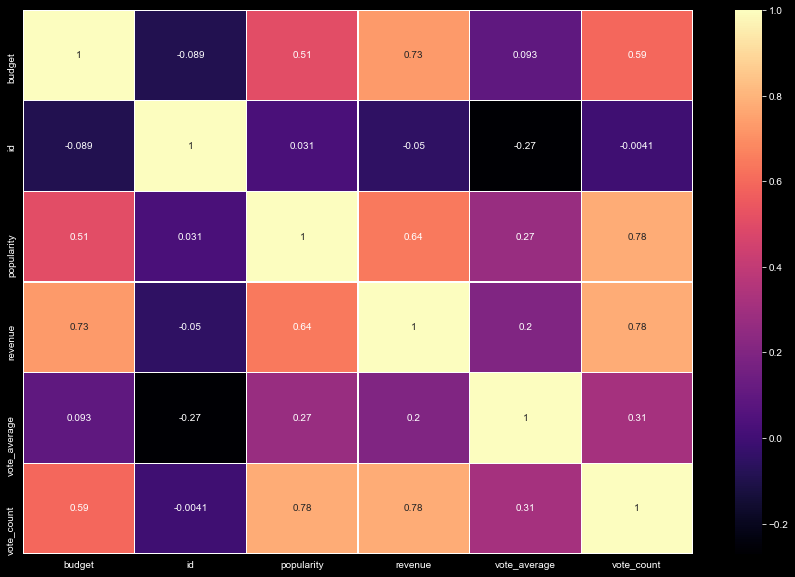

In [26]:
#plotting a heatmap to show the correlation relationships 
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, linewidths=0.05, cmap="magma")

plt.show()

### Determining the score of each movie to rate the movie
We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :

where,

v is the number of votes for the movie;

m is the minimum votes required to be listed in the chart;

R is the average rating of the movie; And

C is the mean vote across the whole report

We already have v(vote_count) and R (vote_average) and C can be calculated as

In [27]:
C= df['vote_average'].mean()
C

6.092171559442011

In [28]:
m= df['vote_count'].quantile(0.9)
m

1838.4000000000015

In [29]:
movies_rate = df.copy().loc[df['vote_count'] >= m]
movies_rate.shape

(481, 23)

In [30]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    
    return (v/(v+m) * R) + (m/(m+v) * C)

In [31]:
movies_rate['score'] = movies_rate.apply(weighted_rating, axis=1)

In [35]:
movies_rate = movies_rate.sort_values('score', ascending=False)
movies_rate[['original_title', 'vote_count', 'vote_average', 'score']].head(10)

,original_title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

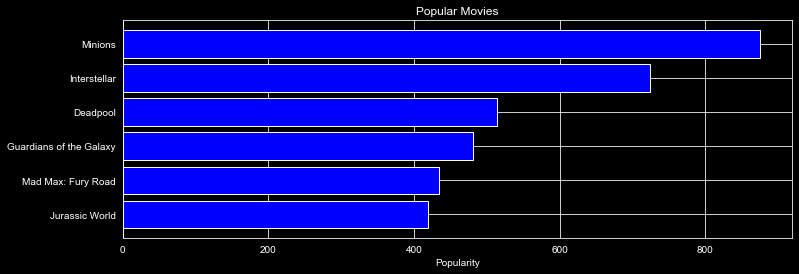

In [37]:
popular_movie= movies_rate.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(popular_movie['original_title'].head(6),popular_movie['popularity'].head(6), align='center',color='blue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")